# 2.2 Properties of the Distributions and Gaussian Distribution

## Objectives

+ Introduction
    + Random variables
    + Probability Distribution,
    + Mean, Median and Mode of a Random variable
    + Expected Value of a Random Variable
    + Variance of a Random Variable
    + Calculation of statistics using python
        + Mean
        + Mode
        + Range
        + Standard deviation
        + Standard Error
+ Expectation/means of a Continuous Random Variable
+ Properties of Expectations
+ Variance and it's properties
+ Continuous Uniform Random variable; Parameter a,b
+ An example of A/D Converter
    + Quantization of signal
        + Introduction
        + Model of Quantization Process
        + Example - Quantization of a sine signal
        + Properties
        + Applications
    + Characteristic of linear uniform quantization
        + Quantization Error of a Linear Uniform Quantizer
+ Computing SNR(Signal-to-Noise Ratio)
    + Model for the Quantization Error
    + Uniformly Distributed Signal
    + Example - Quantization of a uniformly distributed signal
+ Cumulative distributive function
    + Probability Mass and Distribution Function
    + A continuous example: the Uniform Distribution
+ General Normal(Gaussian) random variables
    + Gaussian Distrubutions
    + Variance and Belief
    + The Central Limit Theorem
    + The 68-95-99.7 Rule
    + Computing Probabilities with scipy.stats and tensorflow
+ Calculating normal probabilities
    + Standardisation of Normal distrubution
    + Example : Crowd size
+ Linear functions of a random variable 
+ Conditional Expectation of X,given an event A 
+ Total probability and Expectation theorem
+ Uses in measurement theory
+ References


In [2]:
# Import Numpy
import numpy as np

# Import Scipy
from scipy import stats

# Import Matplotlib
import matplotlib
import matplotlib.pyplot as plt

#Import Seaborn
import seaborn as sns

# Import Tensorflow and Tensorflow Probability
import tensorflow as tf
import tensorflow_probability as tfp

# Use tensorflow.Session()
sess = tf.Session()

/Users/shawn/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Introduction

The last part finished by examining diffrent probability distrubutions. Likewise how these distrubutions function in demonstrating our day to day life occasions. For an istance, Gaussian noise is statistical noise having a probability density function (PDF) varies like bell curve.

In this part , we will talk about on the highlights of desires, mean, change, aggregate distributive capacity and restrictive desire of occasion. The vast majority of you will have information on basic statistcs however I will explain anyway[2]

### Random Variables

The phrase '_Random_' method in dictionary means that an unknown, unspecified, or abnormal character i.e. you'll no longer have any information on its outcome. for instance, every time you roll a dice the *outcome* will be constantly between 1 and 6. If we rolled a truthful dice one million times we'd expect to get a one 1/6 of the time. Thus we say the *probability* of any final results is 1/6.

The variable whose outcome can not be prdicted is known as a random variable. Sample space is the variety of values that an outcome can take , example {1,2,3,4,5,6} is the smaple area for a dice can take.

### Probability Distribution


The probability distribution gives the probability for the random variable to occure or take any value in a sample space[2]. Lets roll a dice and then predict the outcome of each value.

Below table is the probability of each outcome (This table is copied from [2])

|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|


$P(X{=}1) = f(1) = \frac{1}{6}$, This states that the probability of dice can taken value 1 is $\frac{1}{6}$. 

The probabilities for all values of a *discrete random value* is known as the *discrete probability distribution* [2]and the probabilities for all values of a continuous random value is known as the continuous probability distribution[2].

We formulize this requirement [2] as

$$\sum\limits_u P(X{=}u)= 1 \quad \textrm{for discrete distributions}$$

$$\int\limits_u P(X{=}u) \,du= 1  \quad \textrm{for continuous distributions.}$$


### The Mean, Median, and Mode of a Random Variable

Given a fixed information we frequently need to recognise a centre of gravity or average data for the set. This data we called as mean. Its necessory that we should have knowledge of mean because it will supply us to set limits so that every factor or variety can achive it easily. for example[2] we'd need to know the average height of the students in a class. we all know the way to find the average, We compute the suggest via summing the values and dividing by number of the values [2].

Example (This example is copied from [2]):

If the heights of the students in meters is 

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

we compute the mean as

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

We can use the symbol $\mu$ (mu) to denote the mean and We can formalize this computation with the equation[2]

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

In python, tensorflow provides `tf.reduce_mean` for computing the mean.

In [3]:
# Define the values of random variable X
x = [1.8, 2.0, 2.0,1.7, 1.9, 1.6]

# Calculating the mean value of random varaible X
x_mean = tf.reduce_mean(x)
x_mean = sess.run(x_mean)

# Printing out the result
print("The mean value of random variable X is:", x_mean)

The mean value of random variable X is: 1.8333334


The *mode* of a set of numbers is the most repeated number. If a number repeats two times than any other number then its unimodal. If two numbers repeats most number of times then its multimodel

For example, the set {1, 2, 2, 2, 3, 4, 4, 4} has modes 2 and 4, which is multimodal, and the set {5, 7, 7, 13} has the mode 7, and so it is unimodal. 

Under scipy.stats library, mode(array_name) will gives you mode in python.

In [14]:
# Define the values of random variable X
x = [1.8, 2.0, 2.0,1.7, 1.9, 1.6]

# Calculating the mode of random varaible X
x_mode = stats.mode(x)
x_mode = np.sum(x_mode[0])

# Printing out the result
print("The mode of random variable X is:", x_mode)

The mode of random variable X is: 2.0


Finally, the *median* of a set of numbers is the middle point of the set so that half the values are below the median and half are above the median[2]. 

Under tensorflow.contrib.distributions library, percentile(array_name) will gives you median in python.

In [4]:
# Define the values of random variable X
x = [1.8, 2.0, 2.0,1.7, 1.9, 1.6]

# Calculating the median of random varaible X
x_median = tf.contrib.distributions.percentile(x, 50.0)
x_median = sess.run(x_median)

# Printing out the result
print("The median of random variable X is:", x_median)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
The median of random variable X is: 1.9


### Expected Value of a Random Variable

The expected value of a random variable is mean or average value of the sample space and is genrally calculated as summing the all numbers and devide it by the number of values in sample space. 

Let's say we have $x=[4,8,12]$ and each value is equiprobable. Expected value would be the average of 4, 8, and 12, which is 8. In other words, here the expected value is the *mean* of the sample space. Now, Imagine that above 3 numbers are not equiprobable. i.e. 4 ,8,12 have probability of occuring that 20%,40% and 40% respectivly then expected value is not just mean of three numbers, we should also consider its probability of occurance[2].

For this case we could compute, $ E[X] = (4)(0.2) + (8)(0.4) + (12)(0.4) = 8.8$

We can formalize[2] by taking general scenario of $x_i$ and probability as $p_ix_i$

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

If the probabilities are all equal, the expected value is the same as the mean [2]:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

If $x$ is continuous we substitute the sum for an integral, like so

$$\mathbb E[X] = \int_{-\infty}^\infty x\, f(x) \,dx$$

where $f(x)$ is the probability distribution function of $x$. 

### Variance of a Random Variable

Variance means it will tell the dispersion from mean. Even if we have zero mean or non zero mean, it doesn't tell us everything we might want to know. 

For example (This has been adapted from [2]), suppose we have three classes of students, which we label $X$, $Y$, and $Z$, with these heights:

Note: 
Tensorflow provides the function `tf.nn.moments()` to compute the mean and variance at the same time:

In [29]:
# Define the values of random variable X, Y and Z
x = tf.constant([1.8, 1.8, 1.8, 1.8, 1.8], dtype=tf.float32)
y = tf.constant([2.2, 1.5, 2.3, 1.7, 1.3], dtype=tf.float32)
z = tf.constant([1.7, 1.6, 1.4, 1.4, 1.3], dtype=tf.float32)

# Calculating the mean values and variances of random varaible X, Y and Z
x_mean, x_variance = tf.nn.moments(x, axes = 0)
x_mean = sess.run(x_mean)
x_variance = sess.run(x_variance)

y_mean, y_variance = tf.nn.moments(y, axes = 0)
y_mean = sess.run(y_mean)
y_variance = sess.run(y_variance)

z_mean, z_variance = tf.nn.moments(z, axes = 0)
z_mean = sess.run(z_mean)
z_variance = sess.run(z_variance)

# Printing out the result
print("The mean value of random variable X is:", x_mean)
print("The variance of random variable X is:", x_variance)
print("\n")

print("The mean value of random variable Y is:", y_mean)
print("The variance of random variable Y is:", y_variance)
print("\n")

print("The mean value of random variable Z is:", z_mean)
print("The variance of random variable Z is:", z_variance)
print("\n")

The mean value of random variable X is: 1.8
The variance of random variable X is: 0.0


The mean value of random variable Y is: 1.8
The variance of random variable Y is: 0.15200001


The mean value of random variable Z is: 1.4799999
The variance of random variable Z is: 0.021600012




In first class mean of all students height is 1.8 but it won't tell the full story as variance is zero. there is no dispersion in the values, but in the second class , the variance is 0.152. It means there will be variation of height values from mean is 0.152. Same goes to third class with variation of 0.026. If variance is close to zero then there is less dispersion and if variance is high number then there will be huge difference in each number when compared to mean

The equation[2] for computing the variance is

$$\mathit{VAR}(X) = E[(X - \mu)^2]$$

Substituting the expected value as $E[X] = \sum_{i=1}^n p_ix_i$, and we will assume all heights are equally probable, 
so we can substitute to get below formula[2]. 
$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

Due to the change in parameter unit value like variance is in square meters where as mean is in meters, we can also quantify our dispersion inbterms of standard deviation. which can be given as 

$$ std(x) = \sqrt {VAR(X)}$$
 



It is typical to use $\sigma$ for the *standard deviation* and $\sigma^2$ for the *variance*. 

For the second class Y class we compute the standard deviation with

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{\frac{0.16 + 0.09 + 0.25 + 0.01 + 0.25}{5}} \\
\sigma_y&= \sqrt{0.152}=0.3899
\end{aligned}$$

We can verify the standard deviation using `tf.math.reduce_std()` which computes the standard deviation. 'std' is a common abbreviation for standard deviation.

In [35]:
# Define the values of random variable Y
y = tf.constant([2.2, 1.5, 2.3, 1.7, 1.3], dtype=tf.float32)

# Calculating the mean value and variance of random varaible Y
y_mean, y_variance = tf.nn.moments(y, axes = 0)
y_variance = sess.run(y_variance)

# Calculating the standard deviation of random varaible Y
y_std = tf.math.reduce_std(y)
y_std = sess.run(y_std)

# Printing out the result
print("The variance of random variable Y is:", y_variance)
print("The standard deviation of random variable Y is:", y_std)

The variance of random variable Y is: 0.15200001
The standard deviation of random variable Y is: 0.38987178


Let’s create a dataset to work with and plot a histogram to visualise (this example is adapted from [2]):

In [ ]:
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
data = np.round(np.random.normal(5, 2, 10000))
plt.hist(data, bins=10, range=(0,10), edgecolor='black')
plt.show()

In [ ]:
stats.sem(data)

### Calculation of statistics using python

#### Mean

Mean is calculated as below[2]
$$\mu = \dfrac{\sum_{i=1}^{N} x_i}{N}$$

Numpy implements a mean function for calculating the mean:

In [37]:
# Define the data we would calculate
dist = tfp.distributions.Normal(loc=5., scale=2.)

# Calculating the mean value
data_mean = dist.mean()
data_mean = sess.run(data_mean)

# printing out the result
print("The mean value of data is:", data_mean)

The mean value of data is: 5.0


#### Median
The median value[2] is the middlemost value, you take the value in the position of
$$\dfrac{n+1}{2}$$
of the sorted data. If its even number then its the average among middle point value.

Using the library Numpy, we can also calculate the median:

In [38]:
# Define the data we would calculate
data = np.round(np.random.normal(5, 2, 10000))

# Calculating the median of data
data_median = tf.contrib.distributions.percentile(data, 50.0)
data_median = sess.run(data_median)

# Printing out the result
print("The median of data is:", data_median)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
The median of data is: 5.0


#### Mode
The mode is the most frequent value.
We can see from our histogram already that 5 is the modal value.

another example,

In [39]:
# Define the data we would calculate
data = [1,2,3,4,4,5,4,5,4,7,8,7]

# Calculating the mode of data
data_mode = stats.mode(data)
data_mode = np.sum(data_mode[0])

# Printing out the result
print("The mode of data is:", data_mode)

The mode of data is: 4


#### Range
The range gives a measure of how spread apart the values are[2].

The range is simply calculated as the maximum value – minimum value
$$Max(x_i) - Min(x_i)$$

Numpy implements this as a point to point function np.ptp()

In [42]:
# Define the data we would calculate
data = [1,2,3,4,4,5,4,5,4,7,8,7]

# Calculating the Range of data
data_range = np.ptp(data)
print("The range of data is:", data_range)

The range of data is: 7


#### Variance
Variance is a measure of how variable the data is, it is calculated [2] as:
$$\sigma^2 = \dfrac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$$
Numpy implements the variance as a function tf.nn.moments()

In [45]:
# Define the data we would calculate
data = tf.constant([1,2,3,4,4,5,4,5,4,7,8,7],dtype=tf.float32)

# Calculating the variance of data
_, data_variance = tf.nn.moments(data, axes = 0)
data_variance = sess.run(data_variance)

print("The variance of data is:", data_variance)

The variance of data is: 3.9166667


#### Standard Deviation
The variance can get very large for large data sets and so we will often use the standard deviation, which is the square root of the variance:

$$\sigma = \sqrt{\sigma^2}$$


This is implemented in Numpy as np.std()

In [46]:
# Define the data we would calculate
data = tf.constant([1,2,3,4,4,5,4,5,4,7,8,7],dtype=tf.float32)

# Calculating the std of data
data_std = tf.math.reduce_std(data)
data_std = sess.run(data_std)

print("The std of data is:", data_std)

The std of data is: 1.9790571


#### Standard Error
The standard error of the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population. 

The standard error of the mean estimates the variability between samples whereas the standard deviation measures the variability within a single sample(This definition is copied from [2]).

It is calculated as below formula[2]:
$$SE = \dfrac{s}{\sqrt{n}}$$    
Where s is the sample standard deviation.

In [12]:
>>> from scipy import stats
>>> a = np.arange(20).reshape(5,4)
>>> stats.sem(a)
>>> stats.sem(a, axis=None, ddof=0)


1.2893796958227628

## Expectation / Mean of continuous random variable


![Image01](2.2/Image01.PNG "Probability mass function")

In picture (This image is copied from[4]) above, First one on left side indicates probability mass function of discrte random variable and second one on right side indicates probability distrubution function of continuous random variable.

The expectation value of a quantity in regards to the a density(PDF) or probability mass function(PMF) is the weighted sum of the quantity where the weights are probabilties from the distribution[2]. For example, for the discrete random variable X and observation x:
$$E_f[X] = \sum_x x\,f(x)$$
In the continuous case the sum($\sum$) is replaced by an integral of the density:
$$E_f[X] =  \int_{-\infty}^{\infty} x\,f_X(x)\;dx$$

Thus, the expected value, or mean  of X is defined[2] to be 
$$
E_{f}{X} = \int x dF(x) = 
\begin{cases}
\sum_x x f(x) & \text{if X is discrete}\\
\int_{-\infty}^{\infty} x\,f_X(x)\;dx & \text{if X is continuous}
\end{cases}$$




## Properties of expectations

Below are the important properties of expectations[4].

1.  Non Zero expectation
$$\space \quad \textrm{If} \quad X \geq 0 \quad \textrm{then} \quad E(X) \geq 0$$

2.  Expectation with in interval [a,b]
$$\space \quad \textrm{If} \quad a \leq X \leq b \quad \textrm{then} \quad a \leq E(X) \leq b$$

3.  Expected value rule
$$E[g(X)] = \sum_x g(x)\,p_X(x) \quad \textrm{and} \quad E[g(X)] = \int_{-\infty}^{\infty} g(x)\,f_X(x)\;dx$$ 

4. Linearity
Let X be a continuous random variable with mean $μ_X$ and for any real numbers a,b Then

$$\mathrm{E}(aX + b) = a\,\mathrm{E}(X) + b = a\mu_X + b$$

   __Proof :__
For a continuous random variable X, the mean of a function of X, say g(X), is given by
$$\mathrm{E}[g(X)] = \int_{-\infty}^{\infty} g(x)\,f_X(x)\;dx.$$

$$\quad \textrm{So, for}\quad g(X) = aX + b \quad \textrm{we find that}\quad$$

\begin{align*}
  \mathrm{E}(aX+b) &= \int_{-\infty}^{\infty} (ax+b)\,f_X(x)\;dx \\\\
  &= \int_{-\infty}^{\infty} ax\,f_X(x)\;dx + \int_{-\infty}^{\infty} b\,f_X(x)\;dx \\\\
  &= a \int_{-\infty}^{\infty} x\,f_X(x)\;dx + b \int_{-\infty}^{\infty} f_X(x)\;dx \\\\
  &= a\,\mathrm{E}(X) + b=a\mu_X + b. 
  \end{align*}
   

__Proof for linearity with python coding : __
Lets take two arrays x and y.
As per linearity take equation as $z_{xy}=10 \times x+y$ where $z_{xy}$ is the result array with x and y.
Verify the mean $z_{xy}$ with x mean and y mean
It should be $$\overline z_{xy} = 10\times \overline x + \overline y$$


In [56]:
x = tf.constant([1, 2, 3, 4, 5, 6, 8, 9, 10], dtype=tf.float32)
E_x = tf.math.reduce_mean(x)
E_x = sess.run(E_x)

print( 'The expected value is array[x] E(x): ' +str(E_x ))

The expected value is array[x] E(x): 5.3333335


In [57]:
y = tf.constant([11, 22, 33, 44, 55, 66, 88, 99, 100], dtype=tf.float32)
E_y = tf.math.reduce_mean(y)
E_y = sess.run(E_y)

print( 'The expected value is array[y] E(y): ' +str(E_y ))

The expected value is array[y] E(y): 57.555557


In [62]:
## linearity zxy=zx+y=z*10+y  which should lead to E(zxy)=10E(x)+E(y)
zx = 10 * x          ##multiplying each array element of x with 10 ==> zx
zxy = np.add(zx,y)   ##adding each array elements of zx with y ==> zxy

E_zxy = tf.math.reduce_mean(zxy)  ##check for expected value
zxy = sess.run(zxy)
E_zxy = sess.run(E_zxy)

print(zxy)  ##print elements
print( 'The expected value is array[zxy] E(zxy): ' + str(E_zxy ))

[ 21.  42.  63.  84. 105. 126. 168. 189. 200.]
The expected value is array[zxy] E(zxy): 110.888885


In [64]:
## Check linearity for expectations E(zxy)=10E(x)+E(y)
Exp1= E_zxy
Exp2 = 10*E_x + E_y

print(Exp1)
print(Exp2)

if (Exp1 - Exp2) < 0.001: 
    print("Linearity on expectation is prooved")  ## Comparing both expected values before and after applying linearity

110.888885
110.88889217376709
Linearity on expectation is prooved


## Variance and its properties

Below are the definition and properties of Variance[4].

+ Definition 
$$\mathit{VAR}(X) = E[(X - \mu)^2]$$
+ Calculation using expected value rule
$$E[g(X)] = \int_{-\infty}^{\infty} g(x)\,f_X(x)\;dx$$ 

$$\mathit{VAR}(X)= \sigma_X^2 = \mathrm{E}[(X - \mu_X)^2] $$

$$\mathit{VAR}(X)= \int_{-\infty}^{\infty} (x-\mu_X)^2 f_X(x)\;dx.$$

$$\mathit{VAR}(X)=E(X^2)-[E(X)]^2$$

$$\mathit{VAR}(X)=E(X^2)-\mu_X^2$$
+ standard deviation 
$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$
+ Linearity
Let X be a random variable. Then
$$\mathit{VAR}(aX + b) = a^2\,\mathit{VAR}(X) = a^2\,\sigma_X^2,$$
**proof**
$$\begin{align*}
  \mathit{VAR}(aX+b) &= \mathrm{E}\bigl[\bigl(aX+b - (a\mu_X + b)\bigr)^2\bigr] \\\\
  &= \mathrm{E}\bigl[a^2(X - \mu_X)^2\bigr] \\\\
  &= a^2\,\mathrm{E}[(X - \mu_X)^2] \\\\
  &= a^2\,\mathit{VAR}(X) \\\\
  &= a^2\,\sigma_X^2. 
  \end{align*}$$


Lets take an example with python code

$x = [1,2,3,4], $ $z =2x+4$ then $var(z) = 4*var(x)$

In [68]:
x = tf.constant([1,2,3,4,3], dtype=tf.float32)
z = tf.add(tf.multiply(2., x), 4.) # z= 2x+4

V_x = tfp.stats.variance(x)
V_x = sess.run(V_x)
V_z = tfp.stats.variance(z)
V_z = sess.run(V_z)
Vx = tf.multiply(4., V_x)
Vx = sess.run(Vx)

print(V_x)
print(V_z)
print(Vx)

1.04
4.16
4.16


## Continuous uniform random variable ; parameters a,b

![Image02](2.2/Image02.PNG "Uniform distribution")

The picture(This image is copied from [4]) on left side shows that continuous uniform random variable X with parameters a,b. This unifrom random variable has uniform(same) probabibility of occurance over the range[a , b]. Expected value for this can be given as $$E[X] = \int_{-\infty}^{\infty} x\,f_X(x)\;dx$$

+ Expected value
$$E[X] = \int_{a}^{b} x\,\frac{1}{(b-a)}\;dx$$

$$E[X] = \frac {1}{(b-a)} \Bigg | \frac{x^2}{2}\Bigg |_{a}^{b}$$

$$E[X] = \frac {b^2-a^2}{2(b-a)}$$

$$E[X] = \frac{a+b}{2}$$

+ Variance 
$$\mathit{VAR}(X)=E(X^2)-\mu_X^2$$

$$ \quad \textrm {Lets find out the} \quad E[X^2] = \int_{a}^{b} x^2\,\frac{1}{(b-a)}\;dx$$ 

$$ E[X^2] = \frac {1}{(b-a)} \Bigg | \frac{x^3}{3}\Bigg |_{a}^{b}$$

$$ E[X^2] = \frac {1}{(b-a)} \frac {(b^3-a^3)}{3}$$

$$ \quad \textrm {substituting this value, we will get  }\mathit{VAR}(X)=E(X^2)-\mu_X^2$$ 

$$\mathit{VAR}(X)= \frac {1}{(b-a)} \frac {(b^3-a^3)}{3} - \bigg[\frac {a+b}{2}\bigg]^2$$

$$\mathit{VAR}(X)= \frac {1}{(b-a)} \frac {(b-a)(b^2-ab-a^2)}{3} - \bigg[\frac {a+b}{2}\bigg]^2$$

$$\mathit{VAR}(X)=  \frac {(b^2-ab-a^2)}{3} - \bigg[\frac {(a+b)^2}{4}\bigg]$$

$$\mathit{VAR}(X) = \frac {(b-a)^2}{12}$$

The picture[4] on right side shows the discrete uniform random variable with interval [a,b]. Expected value for this can be easily given as centre of gravity between these intervals.
$$E[X]=\frac{a+b}{2}$$

Variance $$\mathit{VAR}(X) = \frac {(b-a)(b-a+2)}{12}$$



   



## An example of A/D Converter


![Image03](2.2/Image03.png "A/D Converter")


We are living in a world where signals often measured in digital rather in analog due to analog signal processing limitations.
All natural signals what we get are analog and its necessory that we should convert these signals to digital before processing them. Analog to Digital convertor will convert analog to digital through the process of sampling and quantization. this process of will be taken as a staircase function to the input signal. through this we can represnt a continuous analog values as discrete digitized  values.

The total number of steps N of the staircase function depends on the resolution k of the AD converter[5]:
$$N=2^k$$

For example(this has been adpated from [5]), a 4 bit Analog to Digital converter maps the input signal to a total of 64 ($2^4$) steps, while a 12-bit AD converter maps to 4096 steps. For a typical input voltage range of 10 volts (-5V to +5V) a single step of an 8-bit converter corresponds to approx. 40 mV, while a 12-bit converter shows a step size of 2.5 mV.

There are some limitation of A/D convertoris that it will only take or measure the values at certain descrete intervals and it has to hold the same value till next interval(Holding). SO there will be diferenece in actual and quantized singal. This error which is commonly called quantization noise. This quantization noise is the difference between the actual and the digitized signal and will decrease with increasing converter resolution k and increasing sampling frequency $f=\frac{1}{Ts}$. 

![Image04](2.2/Image04.png "Quantization error")


Above figure (This is copied from [5]) is explains the quantization and its relative error with actual amplitude.

__Drawbacks__

There are some limitation of A/D convertoris that it will only take or measure the values at certain descrete intervals and it has to hold the same value till next interval(Holding). SO there will be diferenece in actual and quantized singal. This error will be less if your descrte interval time is less which can be acheieved by increasing number of bits in A/D convertor.

The costs for an AD converter approximately doubles with each additional bit, and the conversion speed decrays with higher resolutions(This is adapted from [5]). Thus each application of an AD converter always requires a compromise. Typical resolutions are 8 and 16 bits.

### Quantization of Signals

#### Introduction

We are surounded by analog signals and processing of these signals for each value will be dificult and costly.
So these analog signals will be converted to digital in multiple steps.
+ Sampling : It decides the minimum interval that a sample can be taken from input. If sampling interval is less then the number of samples will be more.
+ Holding : After you take one sample, you should hold that value till next interval and it forms staircase like figure as showed above.
+ Quantization: Its the droping or hitting of sample value to the nearest level.
+ Coding : Send the quantized signal in terms of coding(0 and 1 bits)

This can be illustrated in the following figure[6].


![Image05](2.2/Image05.png "Quantization")

#### Model of the Quantization Process

The quantization error (quantization noise) $e[k]$ is defined as below formula (This is copied from [13]) 
\begin{equation}
e[k] = x_Q[k] - x[k]
\end{equation}

where x_Q[k] is value of quantized signal and x[k] is actual input value.

Below is the quantization process(Image is copied from [5]) that can be modeled by adding the quantization error to the discrete signal.

![Image06](2.2/Image06.png "Quantization error model")

#### Example - Quantization of a sine signal    


In order to illustrate the introduced model, the quantization of one period of a sine signal is considered (this example is adapted from [13])

\begin{equation}
x[k] = \sin[\Omega_0 k]
\end{equation}

using 

\begin{align}
f(x[k]) &= 5 \cdot x[k] \\
i &= \lfloor \, f(x[k]) \, \rfloor \\
g(i) &= \frac{1}{5} \cdot i
\end{align}

where $\lfloor \cdot \rfloor$ denotes the nearest intiger function and $i$ the quantization index. The quantized signal is then given as

\begin{equation}
x_Q[k] = \frac{1}{5} \cdot \lfloor \, 5 \cdot \sin[\Omega_0 k] \, \rfloor
\end{equation}


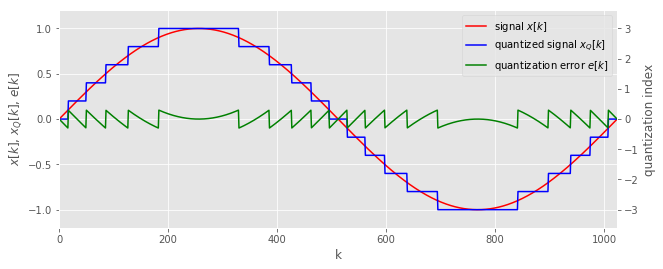

In [18]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1024  # length of signal

# generate signal
x = np.sin(2*np.pi/N * np.arange(N))
# quantize signal
xi = np.round(5 * x)
xQ = 1/5 * xi
e = xQ - x

# plot (quantized) signals
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal $x[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $x_Q[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$')
ax1.axis([0, N, -1.2, 1.2])
ax1.legend()

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel('quantization index')
ax2.grid()

#### Properties

+ Quantization process is irreversible process and you cant reconstruct the exact original signal from quantized signal
+ Quantization process is depends on input signal and noise or error depends on qualization levels set for the process


#### Applications

Quantization has many applications[adapted from 13] such as
* Analog-to-Digital conversion]
* [Lossy compression]
* Storage and transmission 


### Characteristic of a Linear Uniform Quantizer

A uniform quantizer splits the mapped input signal into quantization steps of equal size[13]. 

It means that input signals are devided into equal steps and quantized on each level.

#### Quantization Error of a Linear Uniform Quantizer

Quantization results in many kinds of distortions. *Overload* distortions are a the one where its exceeding the minimal/most amplitude of the quantizer. *Granular distortions* are the one where no clipping occurs in quantization procedure. Numerous measures are used to quantify the distortions of a quantizer. We typically use the signal-to-noise ratio(This defnition has been adapoted from[13].

## Computing SNR(Signal-to-Noise Ratio)

A quantizer can be evaluated by its [signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) (SNR), which is defined as the ration of power of the continuous amplitude signal $x[k]$ to the power of the quantization error $e[k]$, provided signals have been originated through a zero-mean wide-sense stationary (WSS) process.

The average SNR is given as below formula (copied from [7],[14])

\begin{equation}
SNR = 10 \cdot \log_{10} \left( \frac{\sigma_x^2}{\sigma_e^2} \right) \quad \text{ in dB}
\end{equation}

where $\sigma_x^2$ and $\sigma_e^2$ denote the variances of the signals $x[k]$ and $e[k]$, respectively. 


### Model for the Quantization Error

The variance of the quantization error is then derived later by its mean as

\begin{equation}
\sigma_e^2 = \frac{Q^2}{12}
\end{equation}

Let's assume that the quantization index is represented as binary with $w$-bits. Quantizer $x_\text{min}$ can be represented as half of the $2^w$ quantization indexes is used for the negative signal values, the other half for the positive ones including zero. The quantization step is then given[14] as

\begin{equation}
Q = \frac{ |x_\text{min}|}{2^{w-1}} = \frac{ x_\text{max}}{2^{w-1} - 1}
\end{equation}

where $x_\text{max} = |x_\text{min}| - Q$. Introducing the quantization step, the variance of the quantization error[14]can be expressed by the word length $w$ as

\begin{equation}
\sigma_e^2 = \frac{x^2_\text{max}}{3 \cdot 2^{2w}}
\end{equation}

The average power of the quantization error[14] quarters per additional bit spend. Introducing the variance into the definition of the SNR yields

\begin{equation}
\begin{split}
SNR &= 10 \cdot \log_{10} \left( \frac{3 \sigma_x^2}{x^2_\text{max}}  \right) + 10 \cdot \log_{10} \left( 2^{2w} \right) \\
& \approx 10 \cdot \log_{10} \left( \frac{3 \sigma_x^2}{x^2_\text{max}}  \right) + 6.02 w \quad \text{in dB}
\end{split}
\end{equation}

Referring above equation, it can be shown that always SNR decays approximately by 6 dB per additional bit spend. This is often referred to as the 6 dB per bit rule of thumb for linear uniform quantization[14].

### Uniformly Distributed Signal

As shown above, the statistical model for the input signal $x[k]$ is very important to calculate the average SNR of a linear uniform quantizer. For a signal that having a zero-mean uniform distribution[9,14] and under the assumption $x_\text{max} \gg Q$ its PDF is given by below formula[14]

\begin{equation}
p_x(\theta) = \frac{1}{2 x_\text{max}} \text{rect}\left( \frac{\theta}{2 x_\text{max}} \right)
\end{equation}

Thus, all amplitudes between $-x_\text{max}$ and $x_\text{max}$ will have same occurance probability. The variance of the signal[14] is then calculated to

\begin{equation}
\sigma_x^2 = \frac{4 x_\text{max}^2}{12} = \frac {\delta ^2}{12} \quad \textrm{where }\delta = x_\text{max} + {x_\text{max}} 
\end{equation}

Aproximating the equation, which gives us

\begin{equation}
SNR = 10 \cdot \log_{10} \left( 2^{2 w} \right) \approx 6.02 \, w \quad \text{in dB}
\end{equation}

The word length $w$ and resulting SNRs for some typical digital signal representations are given as below (This table is copied from [14])

| | $w$ | SNR |
|----|:----:|:----:|
| Compact Disc (CD) | 16 bit | 96 dB |
| Digital Video Disc (DVD) | 24 bit | 144 dB |
| Video Signals | 8 bit | 48 dB |

For $x_\text{min} \leq \frac{x[k]}{A} < x_\text{max}$. The resulting variance is given as

\begin{equation}
\sigma_x^2 = \frac{4 x_\text{max}^2 A^2}{12}
\end{equation}

introduced into the definition of the SNR yields

\begin{equation}
SNR = 10 \cdot \log_{10} \left( 2^{2 w} \right) + 20 \cdot \log_{10} ( A ) \approx 6.02 \, w + 20 \cdot \log_{10} ( A ) \quad \text{in dB}
\end{equation}

From this it can be concluded that a level of -6 dB is equivalent to a loss of one bit in terms of SNR of the quantized signal.

#### Example - Quantization of a uniformly distributed signal [14]

In this example the linear uniform quantization of a random signal drawn from a uniform distribution is evaluated. The amplitude range of the quantizer is $x_\text{min} = -1$ and $x_\text{max} = 1 - Q$.

SNR = 48.090272 in dB


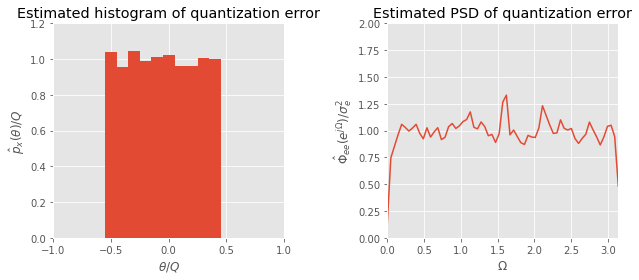

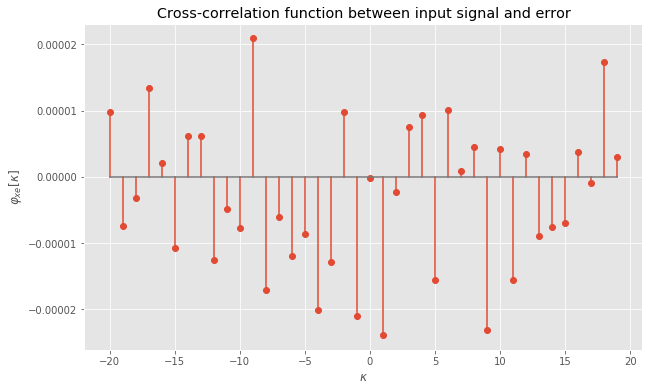

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

w = 8  # wordlength of the quantized signal
xmin = -1  # mimimum amplitude of input signal
N = 8192 # number of samples
K = 20  # maximum lag for cross-correlation

## Defining the uniform midtread quantizer : where x[k] will have middle value between xmin and xmax
def uniform_midtread_quantizer(x, Q):
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)
    
    return xQ

def analyze_quantizer(x, e):
    # estimated PDF of error signal
    pe, bins = np.histogram(e, bins=20, normed=True, range=(-Q, Q))
    # estimate cross-correlation between input and error
    ccf = 1/len(x) * np.correlate(x, e, mode='full')
    # estimate PSD of error signal
    nf, Pee = sig.welch(e, nperseg=128)
    # estimate SNR
    SNR = 10*np.log10((np.var(x)/np.var(e)))
    print('SNR = %f in dB' %SNR)

    # plot statistical properties of error signal
    plt.figure(figsize=(9,4))

    plt.subplot(121)
    plt.bar(bins[:-1]/Q, pe*Q, width = 2/len(pe))
    plt.title('Estimated histogram of quantization error')
    plt.xlabel(r'$\theta / Q$')
    plt.ylabel(r'$\hat{p}_x(\theta) / Q$')
    plt.axis([-1, 1, 0, 1.2])

    plt.subplot(122)
    plt.plot(nf*2*np.pi, Pee*6/Q**2)
    plt.title('Estimated PSD of quantization error')
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$\hat{\Phi}_{ee}(e^{j \Omega}) / \sigma_e^2$')
    plt.axis([0, np.pi, 0, 2])
    plt.tight_layout()
    
    plt.figure(figsize=(10,6))
    ccf = ccf[N-K-1:N+K-1]
    kappa = np.arange(-len(ccf)//2,len(ccf)//2)
    plt.stem(kappa, ccf)
    plt.title('Cross-correlation function between input signal and error')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{xe}[\kappa]$')


# quantization step
Q = 1/(2**(w-1))
# compute input signal
np.random.seed(1)
x = np.random.uniform(size=N, low=xmin, high=(-xmin-Q))
# quantize signal
xQ = uniform_midtread_quantizer(x, Q)
e = xQ - x
# analyze quantizer
analyze_quantizer(x, e)

Above histograms one shows , the quantization error which is uniform i.e. same quantization error for all values.
Second one shows the PSD of error and third one shows the cross correlationship between input signal and the error. 

## Cumulative Distribution Function

The cumulative distribution function[10], or the CDF, is a function, $$F_X : \mathbb{R} → [0, 1]$$ defined by, $$F_X (x) = p(X \le x)$$

A note on notation: X is a random variable while x is a particular value of the random variable.

For example(This is copied from [10]), X be the random variable representing the number of heads in two coin tosses. Then $x$ can take on values 0, 1 and 2. 

The CDF for this random variable can be drawn thus (taken from All of Stats) can be showed as below figure (This is copied from [10])
![Image08](2.2/Image08.png "Cumulative Distribution Function")

Notice that this function is right-continuous and defined for all x, even if x does not take real values in-between the integers.

### Probability Mass and Distribution Function
X is called a discrete random variable which can takes values such as  x1,x2,…x1,x2,…. Then the probability function or the probability mass function[2,10] (pmf) for X by:
$$f_X(x) = p(X=x)$$
$f_X$  is a probability.

The pmf for the number of heads in two coin tosses (taken from All of Stats) looks like below figure:
![Image09](2.2/Image09.PNG "The pmf for the number of heads in two coin tosses")


If a random variable is continuous then we can write formula for continuous random variable [10] if there exists a function fX such that
$$\int_{-\infty}^{\infty} f_X (x) dx = 1 \quad \textrm {and for every } a ≤ b,$$

$$% <![CDATA[
p(a < X < b) = \int_{a}^{b} f_X (x) dx %]]>$$

The function fX is called the probability density function (pdf). We have the CDF:
$$F_X (x) = \int_{-\infty}^{x}f_X (t) dt$$


### A continuous example: the Uniform Distribution
Suppose that X has pdf
$$% <![CDATA[
f_X (x) =
\begin{cases}
1 & \text{for } 0 \leq x\leq 1\\
    0             & \text{otherwise.}
\end{cases} %]]>$$

A random variable[4] with this density is said to have a Uniform (0,1) distribution. This is meant to capture the idea of choosing a point at random between 0 and 1. 

The cdf is given by below example(this is copied from [2],[4])
$$% <![CDATA[
F_X (x) =
\begin{cases}
0 & x \le 0\\
x & 0 \leq x \leq 1\\
1 & x > 1.
\end{cases} %]]>$$

PDF of above function is looks as below[4]:
![Image11_FX](2.2/Image11_FX.PNG "Uniform")

## General Normal (Gaussian) random variables

Difnition says, the normal (or Gaussian) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate [16]. 

Lets plot the gaussian distribution over python.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


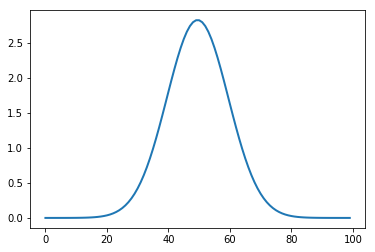

In [3]:
gaussian = tf.distributions.Normal(loc=1.8, scale=0.1414)  # Build gaussian distribution model
x = np.linspace(1.1, 2.5, 100)                             # Assigning the input x
gaussian = gaussian.prob(x)
gaussian = sess.run(gaussian)

# Plot PDF
plt.plot(gaussian, lw=2)

This curve is a PDF. It shows the relative likelihood  for the random variable to take on a value. 

In the example [2] chart above, a student is more probability for having height near 1.8 m than 1.7 m, and same goes to hight of 1.9 m vs 1.4 m.


Above one is a 'bell curve'. In real world conditions many observations are distributed in such a manner. This curve has peak at the means indicates there is more probability of occurance of numbers around mean compared extreme ends.


### Gaussian Distributions

Let's explore how Gaussians work. A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as below [2]:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

$\exp[x]$ is notation for $e^x$.

<p>We will plot a Gaussian with a mean of 10 $(\mu=10)$, with a std of 1.5, and then discuss what this means. 

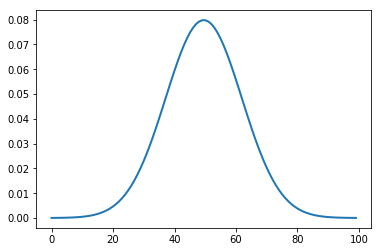

In [19]:
gaussian = tf.distributions.Normal(loc=10., scale=5.0)  # Build gaussian distribution model
x = np.linspace(-10, 30, 100)                             # Assigning the input x
gaussian = gaussian.prob(x)
gaussian = sess.run(gaussian)

# Plot PDF
plt.plot(gaussian, lw=2)

Above curve indicates that thermometer which reads 10'C. All thermometers are not accurate but we expect that each reading will be nearer to the actual value. 

In order to find the area under the curve , integrate the equation for the Gaussian (Copied from [2]) 

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

Use library as `filterpy.stats.norm_cdf` which computes the integral for you. For example, we can compute

In [13]:
gaussian = tf.distributions.Normal(loc=10.0, scale=5.0)  # Build gaussian distribution model

p1 = gaussian.cdf(6) - gaussian.cdf(5)
p1 = sess.run(p1)
print('Probability of range 5 to 6 is {:.2f}%'.format(p1))

p2 = gaussian.cdf(10) - gaussian.cdf(6)
p2 = sess.run(p2)
print('Probability of range 6 to 10 is {:.2f}%'.format(p2))

Probability of range 5 to 6 is 0.05%
Probability of range 6 to 10 is 0.29%


### The Variance and Belief

Variance decides the sharpness of the curve, if its high then then large dispersion of values around mean and less sharp.
If its low then its more sharp.

Please find the below python code to illustrate above thing.

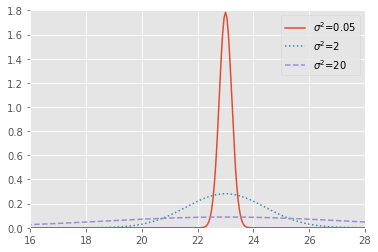

In [23]:
from filterpy.stats import gaussian

xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.05), label='$\sigma^2$=0.05')
plt.plot(xs, gaussian(xs, 23, 2), label='$\sigma^2$=2', ls=':')
plt.plot(xs, gaussian(xs, 23, 20), label='$\sigma^2$=20', ls='--')
plt.axis([16,28,0.000,1.8])##zooming the graph
plt.legend()
plt.show()

### The Central Limit Theorem

Mean of all distribution follows the cental limit theorem and its them most important theorem in the statistics.

The sum of $N$ independent and identically distributed (iid) random variables will look similerto a Gaussian for large $N$.
Mathematically, let $X_1,X_2,\dots$ be iid random variables with mean $\mu$ and variance $\sigma^2$ and define the running average of the random variables (This defnition is copied from [10]):
$$
S_N = \frac{X_1+\dots+X_N}{N}.
$$
The Central Limit Theorem (CLT), states that:
$$
S_N \sim \mathcal{N}(S_N|\mu, \frac{\sigma^2}{N}),
$$
for large $N$.
We are not going to prove this, but let us test it numerically:


### The  68-95-99.7 Rule

In the thory of linear regression, we know that we need to find the confidence interval where the probability of getting the value is high(Close to 100%). In practical, we wont get 100% confidence. In practical we can have derive upto 99.7 to 95% confidence interval.

+ 99.7% confidence will be lies in the interval of $\mu-3\sigma$
+ 95% confidence will be lies in the interval of $\mu-2\sigma$
+ 68% confidence will be lies in the interval of $\mu-1\sigma$

The following graph depicts the relationship between the standard deviation and the normal distribution[1]. 

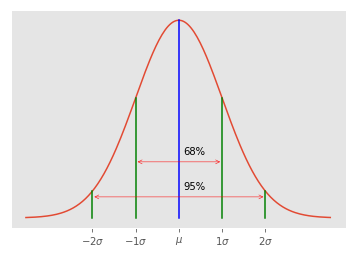

In [37]:
from gaussian_internal import display_stddev_plot  ##make sure the gausian internal file in your directory 
display_stddev_plot()
##(below plotting has been copied from [2]) 

### Computing Probabilities with tensorflow.distributions

Below are the coding examples for computing probability in python which includes normal and standard normal

In [21]:
dist = tf.distributions.Normal(loc=2., scale=3.)
p1 = dist.prob(1.5)
p1 = sess.run(p1)

print('pdf of 1.5 is %.4f' % p1)

pdf of 1.5 is 0.1311


The call `norm(2, 3)`calls scipy and creats one random distribution withg mean of 2 and a standard deviation of 3. and returns its object. (This is adapted from [17]):

In [22]:
p2 = dist.prob(2.5)
p2 = sess.run(p2)
print('pdf of 2.5 is also  %.4f' % p2)

p3 = dist.prob(2.)
p3 = sess.run(p3)

print('pdf of 2 is         %.4f' % p3)

pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


##  Calculating Normal probabilities

For continuous random variables, PDF means that its the total area under the curve. To find the probability in an interval we need to use cumulative distribution.

The standard normal distribution will have zero mean and one variance denoted by $Z\sim N(0,1)$ .

That is $$Z \stackrel{\mathrm{d}}{=} \mathrm{N}(0,1)$$
$$f_Z(z) = \dfrac{1}{\sqrt{2\pi}} \exp\bigl(-\tfrac{1}{2} z^2\bigr), \qquad\text{for } z \in \mathbb{R}.$$

We genreally the normalise our distribution just becuase we need zero as our mean and eases our calculations.

## Standardisation of a Normal distribution

$$\quad \textrm {If} \quad X \stackrel{\mathrm{d}}{=} \mathrm{N}(\mu,\sigma^2) \quad \textrm {and} \quad X_s = \dfrac{X-\mu}{\sigma} \quad \textrm {then} \quad X_s \stackrel{\mathrm{d}}{=} \mathrm{N}(0,1)$$


** Proof **
The result is established by first considering the cdf of Xs. We have
$$\begin{align*}
  F_{X_s}(z) &= \Pr(X_s \leq z) \\\\
  &= \Pr\Bigl(\dfrac{X-\mu}{\sigma} \leq z\Bigr) \\\\
  &= \Pr(X \leq \sigma z + \mu) \\\\
  &= F_X(\sigma z + \mu).
  \end{align*}$$
Hence
$$\begin{align*}
  f_{X_s}(z) &= \dfrac{d}{dz} F_{X_s}(z) \\\\
  &= \dfrac{d}{dz} F_X(\sigma z + \mu) \\\\
  &= \sigma f_X(\sigma z + \mu) \qquad\qquad \text{(by the chain rule)} \\\\
  &= \dfrac{1}{\sqrt{2\pi}} \exp\bigl(-\tfrac{1}{2} z^2\bigr).
  \end{align*}$$

The cdf of $$  Z \stackrel{\mathrm{d}}{=} \mathrm{N}(0,1)$$ <br>
$$F_Z(z) = \int_{-\infty}^z \dfrac{1}{\sqrt{2\pi}} \exp\bigl(-\tfrac{1}{2}t^2\bigr) \;dt.$$





## Example: Crowd size
Suppose that crowd size at home games for a particular football club follows a Normal distribution with mean 26 000 and standard deviation 5000. What percentage of crowds are between 31000 and 36000 (This example is copied from [11])?

**Answer **
$$X \stackrel{\mathrm{d}}{=} \mathrm{N}(26\;000, 5000^2)$$

$$X_s = \dfrac{X - 26\;000}{5000} \stackrel{\mathrm{d}}{=} \mathrm{N}(0,1)$$

$$\begin{align*}
  \Pr(31\;000 < X < 36\;000) &= \Pr\Bigl(\dfrac{31\;000 - 26\;000}{5000} < \dfrac{X - 26\;000}{5000} < \dfrac{36\;000 - 26\;000}{5000}\Bigr) \\\\
  &= \Pr(1 < X_s < 2) \\\\
  &= F_{X_s}(2) - F_{X_s}(1) \\\\
  &= 0.9772 - 0.8413 \\\\
  &= 0.1359.
  \end{align*}$$
  


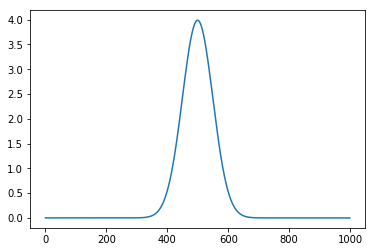

In [27]:
dist = tf.distributions.Normal(loc=0., scale=0.1)
x = np.linspace(-1, 1, 1000)
norm = dist.prob(x)
norm = sess.run(norm)

plt.plot(norm)

In [32]:
dist = tf.distributions.Normal(loc=100., scale=12.)
cdf = dist.cdf(100)
cdf = sess.run(cdf)

print(cdf)

0.5


## Linear functions of a random variable

Let Function Y as linear function of $X$  as below equation [4]
$$ Y = aX+b, \quad X\sim N(\mu,\sigma^2) $$ 
As we know that
$$E(Y) = aE(X)+b$$
Output function Y can be expressed as 
$$Y \sim (a\mu_X+b , a^2\sigma_X^2)$$
$$\mu_Y=a\mu_X+b \quad \sigma_Y^2 = a^2\sigma_X^2$$

In [37]:
# Define the values of random variable X
x = [1., 2., 3., 4., 5., 6., 8., 9., 10.]

# Calculating the mean value of random varaible X
E_x = tf.reduce_mean(x)
E_x = sess.run(E_x)

# Printing out the result
print( 'The expected value is array[x] E(x): ' +str(E_x))

The expected value is array[x] E(x): 5.3333335


In [38]:
## linearity y=ax+b, let a=10 and b=2
a = 10
b = 2
x = [1., 2., 3., 4., 5., 6., 8., 9., 10.]

y = np.multiply(a, x) + b
print("linearity y=ax+b=", y)

E_y = tf.reduce_mean(y)
E_y = sess.run(E_y)
print( 'The expected value is array[y] E(y): ' +str(E_y ))

linearity y=ax+b= [ 12.  22.  32.  42.  52.  62.  82.  92. 102.]
The expected value is array[y] E(y): 55.333333333333336


To check linearity lets calculate mean and variance of Y and compare it with x
$$\mu_Y= 55.33 $$

$$a\mu_X+b=10*5.33+2=55.33$$

$$\sigma_Y^2 = 888.888 $$ and  $$ a^2\sigma_X^2= 10^2*8.888 = 888.88$$

$$\mu_Y=a\mu_X+b \quad \sigma_Y^2 = a^2\sigma_X^2$$ 

In [43]:
x_var = tfp.stats.variance(x)
x_var = sess.run(x_var)

print("The mean of x is:", E_x)
print("The variance of x is:", x_var)

y_var = tfp.stats.variance(y)
y_var = sess.run(y_var)

print("The mean of x is:", E_y)
print("The variance of x is:", y_var)

The mean of x is: 5.3333335
The variance of x is: 8.888889
The mean of x is: 55.333333333333336
The variance of x is: 888.8888888888889


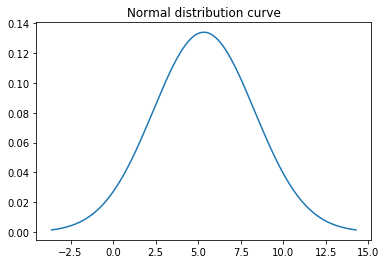

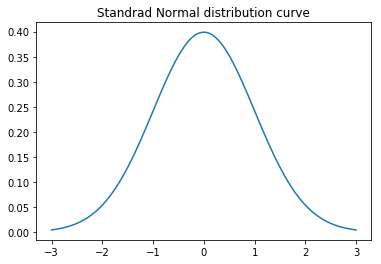

In [44]:
from scipy.stats import norm
import pylab as pl
import math

mu = 5.33 # mean and standard deviation
variance = 8.88
plt.title("Normal distribution curve")
sigma  =math.sqrt(variance) #caluculating sigma as square root og variance
x = np.linspace(mu - 3 * sigma, mu + 3 *sigma, 1000) # Assigning the input x values depending upon the bin

plt.plot(x, norm.pdf(x,mu,sigma)) #plotting  normal curve
plt.show()

##plotting standard Normal pdf of x
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.title("Standrad Normal distribution curve")
plt.plot(x,norm.pdf(x, mu, sigma))
plt.show()

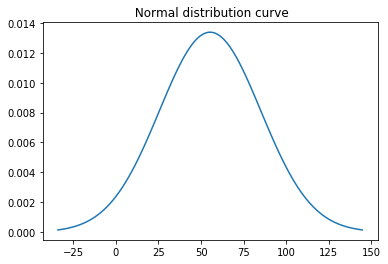

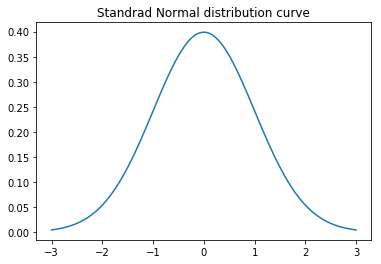

In [47]:
from scipy.stats import norm
import pylab as pl
import math

mu = 55.33 # mean and standard deviation
variance = 888.88
sigma = math.sqrt(variance) #calculating sigma as square root og variance

y = np.linspace(mu - 3 * sigma, mu + 3 *sigma, 100) # Assigning the input y values depending upon the bin
plt.title(" Normal distribution curve")
plt.plot(y, norm.pdf(y,mu,sigma)) #plotting normal curve
plt.show()

##plotting standard Normal pdf of Y
mu = 0
variance = 1
sigma = math.sqrt(variance)
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.title("Standrad Normal distribution curve")
plt.plot(y,norm.pdf(y, mu, sigma))
plt.show()

## Conditional Expectaion of X, given an event A

The conditional expectation, conditional expected value, or conditional mean of a random variable is its expected value given that a certain set of "conditions" is known to occur. In the case when the random variable is defined over a discrete probability space, the "conditions" are a partition of this probability space. (This definition is copied from [4]).

With two random variables X and A, if one random variable X is having mean which is independent of A, then conditional expectation of X given A is equals to the random variable's (unconditional) expected value. This always true if the variables are independent.

If there is a probability of occurance of one random variable with other then conditional expectation is given by the individual product of their expected values and probability as explained above.

Below are some useful statistics equations(copied from [4])

$$ E(X) = \sum_x xp_X(x)\quad \quad \quad \quad \quad \quad E(X) =  \int_{-\infty}^{\infty} { xf_X(x) dx }$$

$$ E(X | A) = \sum_x xp_{X|A}(x)\quad \quad \quad \quad \quad E(X|A) =  \int_{-\infty}^{\infty} { xf_{X | A}(x) dx }$$

__Expected Value Rule__
$$E[g(X)] = \sum_x g(x)\,p_X(x) \quad \quad \quad \quad E[g(X)] = \int_{-\infty}^{\infty} g(x)\,f_X(x)\;dx$$

$$E[g(X | A)] = \sum_x g(x)\,p_{X|A}(x) \quad \quad \quad \quad E[g(X|A)] = \int_{-\infty}^{\infty} g(x)\,f_{X|A}(x)\;dx$$


## Total probability and Expectation theorem

![Image13_PX.PNG](2.2/Image13_PX.PNG "Probability tree")
![Image14_PX_A](2.2/Image14_PX_A.PNG "Probability tree")

(Above figures are copied from[4])

In probability theory, the law (or formula) of total probability is a fundamental rule relating marginal probabilities to conditional probabilities. It expresses the total probability of an outcome which can be realized via several distinct events—hence the name(Definition is copied from [18]).

Lets $A_1,A_2... A_n$ are the probabilities and B is marginal probability then It is given the sum of individual probabilities and their conditional probabilities. 

$$p(B)= p(A_1)p(B \mid A_1)+p(A_2)p(B \mid A_2)+......+p(A_n)p(B\mid A_n)$$

$$p_X(x)= p(A_1)p_{X\mid A_1}(x) +p(A_2)p_{X\mid A_2}(x)+......+p(A_n)p_{X\mid A_n}(x)$$

$$f_X(x)= p(A_1)f(X \mid A_1)+p(A_2)f(X \mid A_2)+......+p(A_n)f(X\mid A_n)$$

$$E[X]= p(A_1)E[X\mid A_1] +p(A_2)E[X\mid A_2]+......+p(A_n)E[X\mid A_n]$$

In other words,For Discrete random variables[4],
$$p_X(x)= \sum_yp_Y(y)p_{X\mid Y}(x\mid y)$$
$$E[X \mid Y=y]= \sum_x x p_{X\mid Y}(x\mid y)$$
$$E[X]= \sum_y p_Y(y)E[X \mid Y=y]$$

For Continuous random variables[4]
$$f_X(x) = \int_{-\infty}^{\infty} f_Y(y)\,f_{X\mid Y}(x \mid y)\;dy$$
$$E[X \mid Y=y] = \int_{-\infty}^{\infty} xf_{X\mid Y}(x \mid y)\;dx$$
$$E[X] = \int_{-\infty}^{\infty} f_Y(y)E(X\mid Y= y)\;dy$$

__Example:__ 

(this example is copied from [4])

![Image10](2.2/image10.png "Expectation")

In the above figure, Function 
$f_X(x)$ is given and an event $ A = \frac {a+b}{2}\leq X \leq b $,  what is $E(X|A)$  and $VAR(X^2|A)$ 

__Answer__

__a.__

As we know that 
$$E[X \mid A =y]= \sum_x x p_{X\mid A}(x\mid y)$$

$$E[X \mid A ] = \sum_{\frac{a+b}{2}}^{b} \frac {1}{2} $$

$$E[X \mid A ] = \frac{1}{2} [\frac {a+b}{2}+b ]$$

$$E[X \mid A ] = \frac{a}{4} +\frac {3b}{4} $$


__b.__

Variance 
$$\mathit{VAR}(X \mid A)=E(X^2 \mid A)-\mu_{X \mid A}^2$$

$$ \quad \textrm {Lets find out the} \quad E[X^2 \mid A] = \int_{\frac {a+b} {2}}^{b} x^2\,\frac{2}{(b-a)}\;dx$$ 

$$ E[X^2 \mid A] = \frac {2}{(b-a)} \Bigg | \frac{x^3}{3}\Bigg |_{\frac {a+b} {2}}^{b}$$

$$ E[X^2 \mid A] = \frac {1}{12(b-a)} {[b^3-(a+b)^3]}$$

Substituting in above equation of _VAR(X)_

$$\mathit{VAR}(X \mid A)=E(X^2 \mid A)-\mu_{X \mid A}^2$$

$$\mathit{VAR}(X \mid A)= \frac {1}{12(b-a)} {[b^3-(a+b)^3]} - [\frac{a}{4} +\frac {3b}{4}]^2$$

## Uses in Measurement thoery

Lets find out the how the important statistics have been calculated in measurement theory.
Although its just recap on what we just went so far.

- __Mean__ 
The mean (or average) is the most popular and well known measure of central tendency. It can be used with both discrete and continuous data, if we have n values in a data set and they have values x1, x2, ..., xn, the sample mean, usually denoted by  (pronounced x bar), is [12]:

$$  \overline{x} = \sum_{p=1}^{p=n}\frac {x_p}{n}$$

- __Probability density function__
Its just the area under the curve of probability distribution plot of random variable X, in other words its the total probability of occurance of random variable X in the sample space[12]

   if p(x) is the probability of happening of any random variable x within the given interval (a, b) then
$$p(x) = \int_{a}^{b}p(x) dx =1$$

- __Epected value of a random variable__
The best estimate of the expected value of a random variable of n independent
observations x1; x2; x3; : : :; xn obtained under same conditions of measurement is
the arithmetic mean of n observations[12].

$$  \overline{x} = \sum_{p=1}^{p=n}\frac {x_p}{n}$$

- __Variance__
The measure of dispersion is variance. The best estimate of the population variance
from the sample of size n is given[12]

$$ s^2 = \frac{\sum_{p=1}^{p=n}{(x_p -  \overline{x})^2}}{n-1}$$

- __Standard deviation__ – the positive square root of variance is given by
The standard deviation is a measure of the spread of scores within a set of data. Usually, we are interested in the standard deviation of a population. However, as we are often presented with data from a sample only, we can estimate the population standard deviation from a sample standard deviation[12].

$$ s = \Bigg\{\frac{\sum_{p=1}^{p=n}{(x_p -  \overline{x})^2}}{n-1}\Bigg\}^\frac{1}{2}$$

- __Standard Error__
standard error is the standard deviation of the sampling distribution of a statistic. Standard error is a statistical term that measures the accuracy with which a sample represents a population. In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error[12].

$$ S_E = \frac {s}{\sqrt n} =  \Bigg\{\frac{\sum_{p=1}^{p=n}{(x_p -  \overline{x})^2}}{n(n-1)}\Bigg\}^\frac{1}{2}$$

(Above equations are copied from [12])


## Reference

### Notebooks

+ [1].  https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

+ [2].  Roger Labbe, Jupyter notebook, https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/03-Gaussians.ipynb

+ [3].  http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html [Accessed January 24, 2018]

+ [6]  https://github.com/spatialaudio/digital-signal-processing-lecture [Accessed January 24, 2018]

+ [14] https://github.com/spatialaudio/digital-signal-processing-lecture/blob/master/quantization/linear_uniform_quantization_error.ipynb



### Figures and Equations

+ [4] Professor Nikos Tsitsiklis, "Introduction to Probability - The Science of Uncertainty", Probability slides from the course MITx:6.041x 

+ [7] https://en.wikipedia.org/wiki/Signal-to-noise_ratio [Accessed January 24, 2018]

+ [8] https://en.wikipedia.org/wiki/Quantization_(signal_processing) [Accessed January 24, 2018]

+ [9] https://en.wikipedia.org/wiki/Uniform_distribution_(continuous) [Accessed January 24, 2018]

+ [13] https://github.com/spatialaudio/digital-signal-processing-lecture/blob/master/quantization/introduction.ipynb [Accessed January 24, 2018]

+ [15] http://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/quantization/linear_uniform_characteristic.html

### Internet Documents

+ [5]. H. Lohninger, "Fundamentals of Statistics data analysis and chemometrics", lectures and courses of on statistics.
http://www.statistics4u.com/fundstat_eng/ee_analog_dig_conversion.html [Accessed January 24, 2018]

+ [10]. Rahul Dave, Lecture course on Statistics and Data. https://am207.github.io/2017/terms.html#probability [Accessed January 24, 2018]

+ [11] http://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4f/4f_2content_3.html [Accessed January 24, 2018]

+ [16] https://en.wikipedia.org/wiki/Normal_distribution

+ [17] (http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.normfor)

+ [18] https://en.wikipedia.org/wiki/Law_of_total_probability

+ [19] 'Tensorflow.org', TensorFlow Core 1.13, Module: tf.distributions[online],https://www.tensorflow.org/api_docs/python/tf/distributions

+ [20] 'Matplotlib.org', Matplotlib version 3.1.0 Documentation[online],https://matplotlib.org/3.1.0/index.html

### E-books

+ [12] S.V Gupta, " Measurement Uncertainties",Physical Parameters and Calibration of Instruments, e-ISBN 978-3-642-20989-5




